### Required libraries for the Application

In [100]:
import pandas as pd
import numpy as np 
from pathlib import Path
%matplotlib inline 

In [101]:
file = Path("../Quantitative-Analysis/Resources/whale_navs.csv")

whale_df = pd.read_csv(file, index_col="date", parse_dates=True, infer_datetime_format=True)

whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2014-10-01,31.950240,14.991826,59.977830,51.948712,194.35
2014-10-02,31.936110,14.994072,59.978626,51.957619,194.38
2014-10-03,31.969707,14.999596,60.002264,52.022484,196.52
2014-10-06,32.048215,14.999471,60.006244,52.036387,196.29
2014-10-07,31.964216,14.994720,59.993735,52.005864,193.26


In [102]:
daily_return_whale = whale_df.pct_change().dropna()

daily_return_whale.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2014-10-02,-0.000442,0.000150,0.000013,0.000171,0.000154
2014-10-03,0.001052,0.000368,0.000394,0.001248,0.011009
2014-10-06,0.002456,-0.000008,0.000066,0.000267,-0.001170
2014-10-07,-0.002621,-0.000317,-0.000208,-0.000587,-0.015436
2014-10-08,0.000390,0.000369,0.000242,0.000842,0.017489


## Quantitative Analysis

###  Analyze the Performance


<AxesSubplot:title={'center':'Daily return of the 4 funds and the S&P 500'}, xlabel='date'>

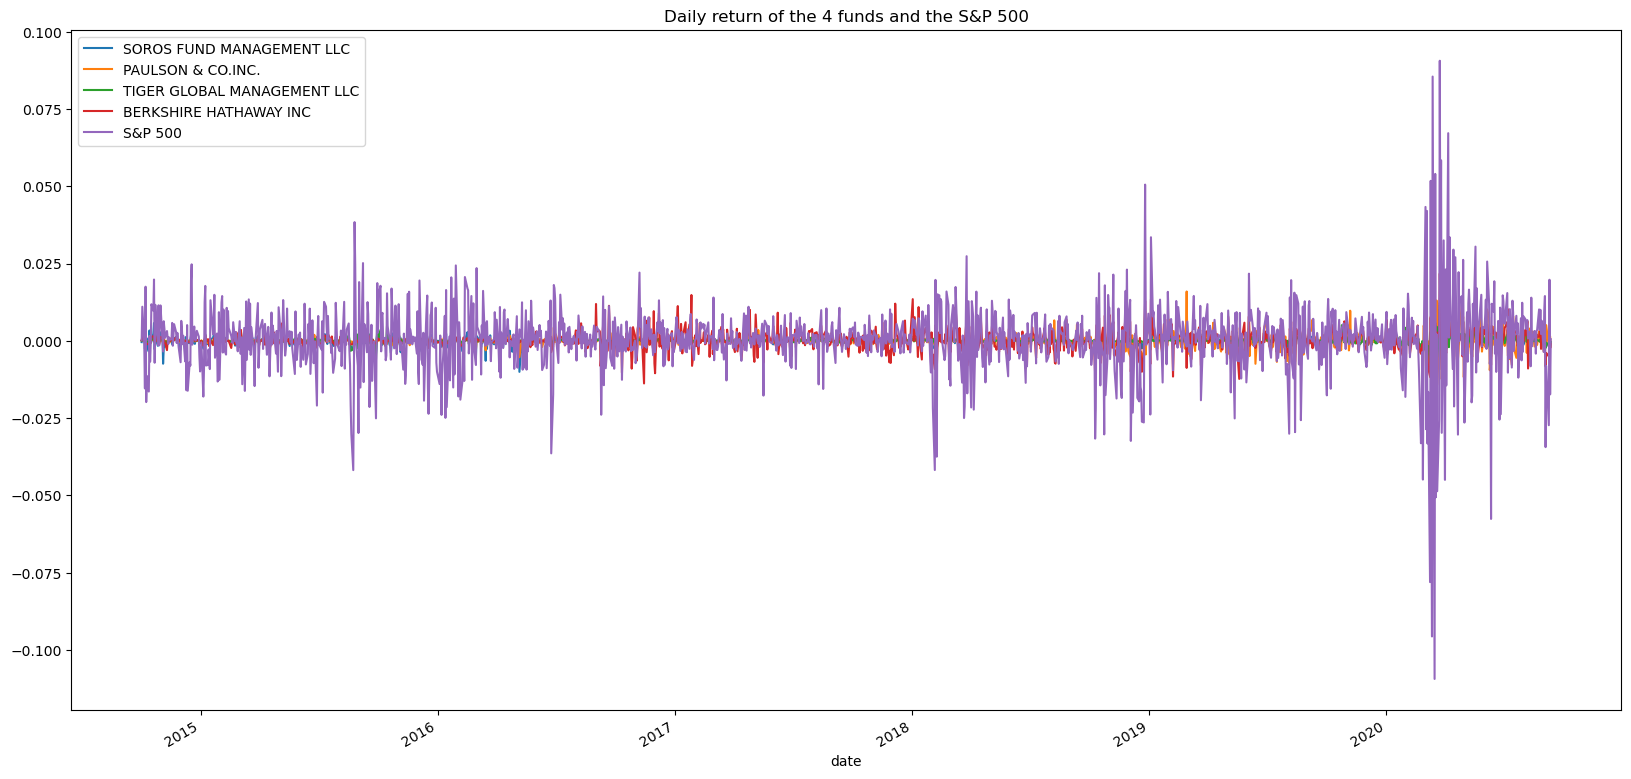

In [103]:
daily_return_whale.plot(figsize=(20,10), title="Daily return of the 4 funds and the S&P 500")

In [104]:
cumulative_return_whale = (1+daily_return_whale).cumprod()

cumulative_return_whale.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2020-09-04,0.987355,0.958187,1.055714,1.244856,1.762645
2020-09-08,0.985640,0.956378,1.054373,1.238608,1.714484
2020-09-09,0.986739,0.958409,1.057221,1.240858,1.748341
2020-09-10,0.985498,0.959740,1.055539,1.237883,1.717983
2020-09-11,0.985086,0.957887,1.055081,1.236625,1.718858


<AxesSubplot:title={'center':'Cumulative return of the 4 funds and S&P 500'}, xlabel='date'>

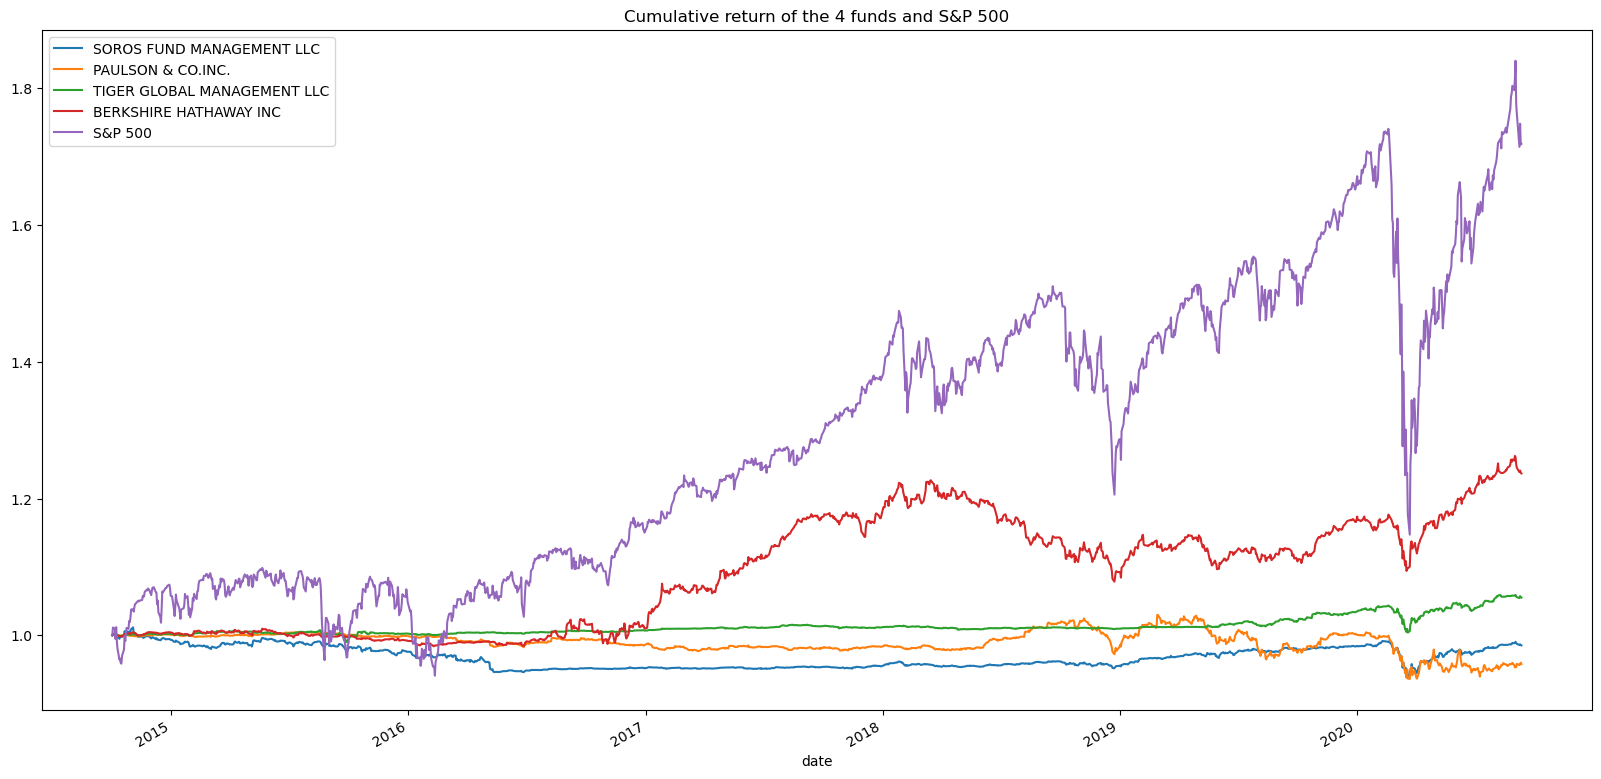

In [105]:
cumulative_return_whale.plot(figsize=(20,10),title = "Cumulative return of the 4 funds and S&P 500")

<AxesSubplot:title={'center':'Cumulative return of the 4 funds and S&P 500'}, xlabel='date'>

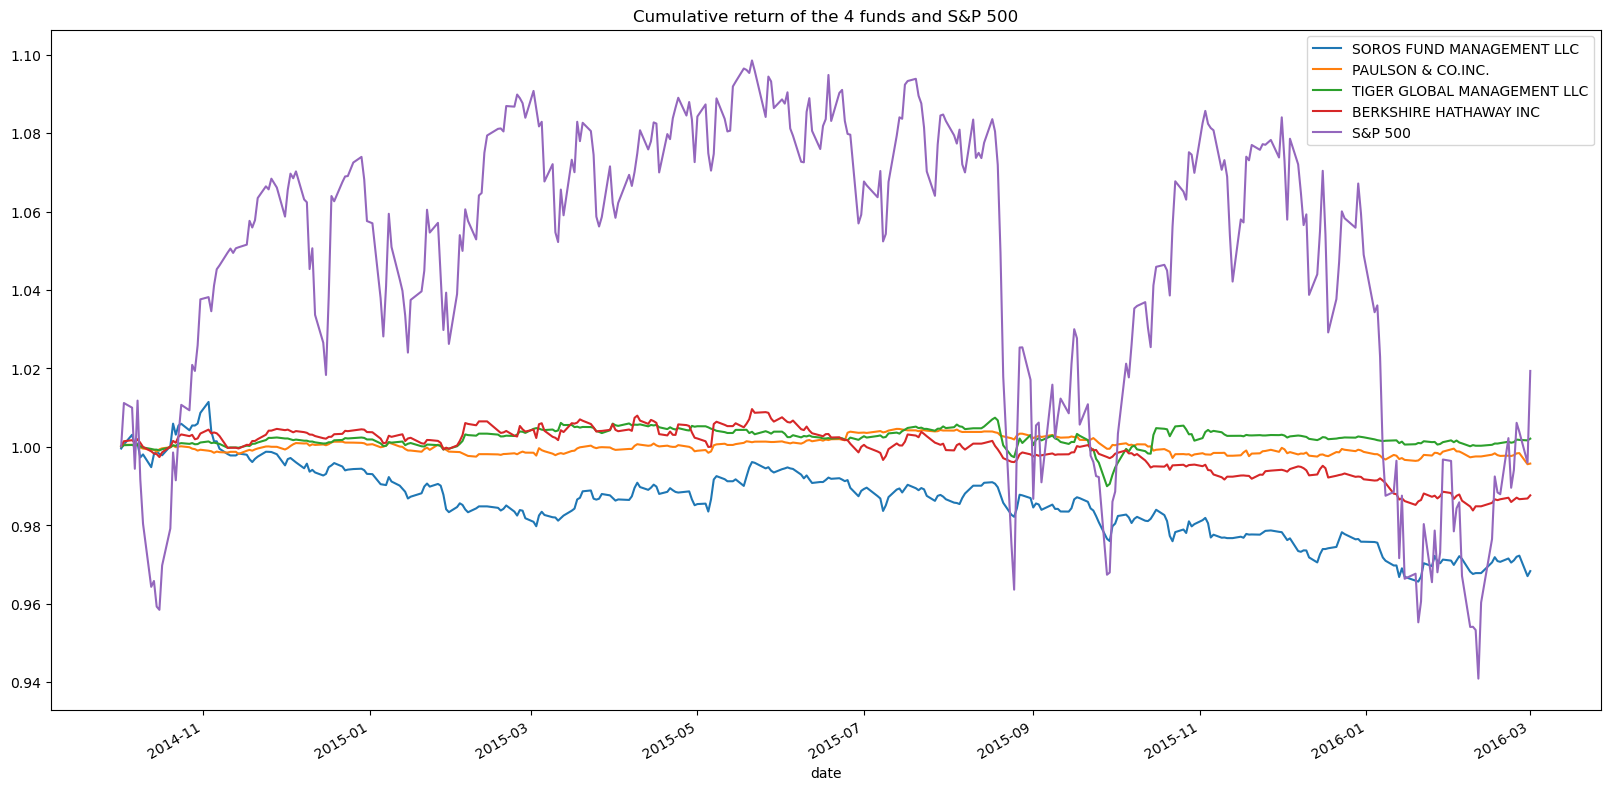

In [106]:
cumulative_return_whale[:"2016-03-01"].plot(figsize=(20,10),title = "Cumulative return of the 4 funds and S&P 500")

**Question** Based on the cumulative return data and the visualization, do any of the four fund portfolios outperform the S&P 500 Index?

**Answer** Based on the the visulization above, we can see that the 4 funds outpreformed S&P 500 in mid November 2014 and in the first quarter of 2016.

## Analyze the Volatility

<AxesSubplot:title={'center':'Visualizing the voltailty of the 4 funds and the S&P 500'}>

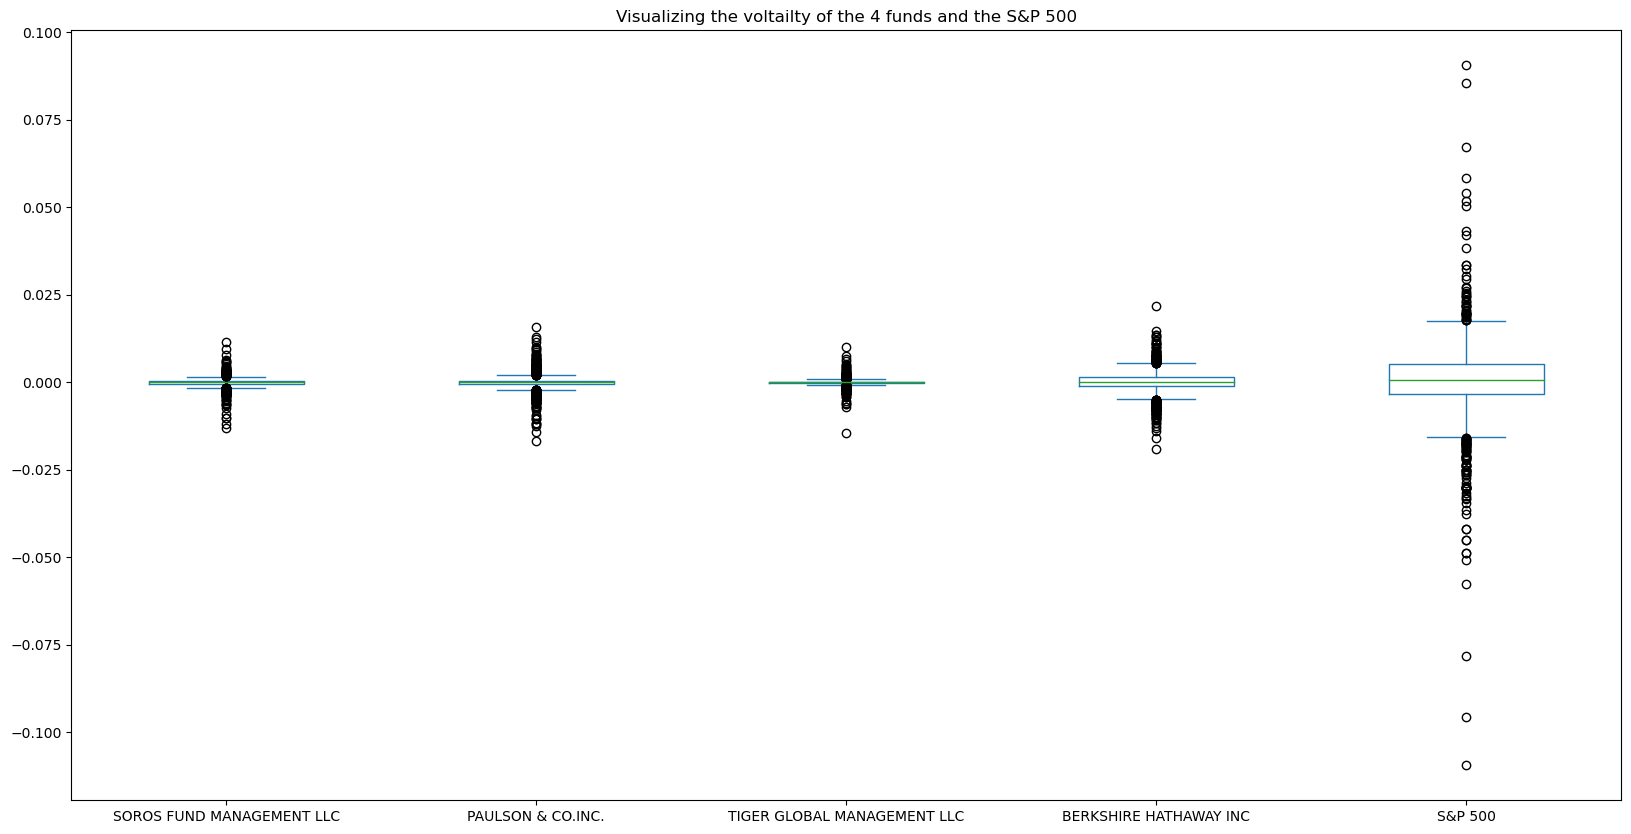

In [107]:
daily_return_whale.plot.box(figsize=(20,10), title="Visualizing the voltailty of the 4 funds and the S&P 500")

In [108]:
funds_daily_return = daily_return_whale.drop(columns="S&P 500")

funds_daily_return.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
date,,,,
2014-10-02,-0.000442,0.000150,0.000013,0.000171
2014-10-03,0.001052,0.000368,0.000394,0.001248
2014-10-06,0.002456,-0.000008,0.000066,0.000267
2014-10-07,-0.002621,-0.000317,-0.000208,-0.000587
2014-10-08,0.000390,0.000369,0.000242,0.000842


In [109]:
funds_daily_return.std().sort_values()

TIGER GLOBAL MANAGEMENT LLC    0.000996
SOROS FUND MANAGEMENT LLC      0.001405
PAULSON & CO.INC.              0.002199
BERKSHIRE HATHAWAY INC         0.003256
dtype: float64

<AxesSubplot:title={'center':'Daily return visualization for the 4 funds'}>

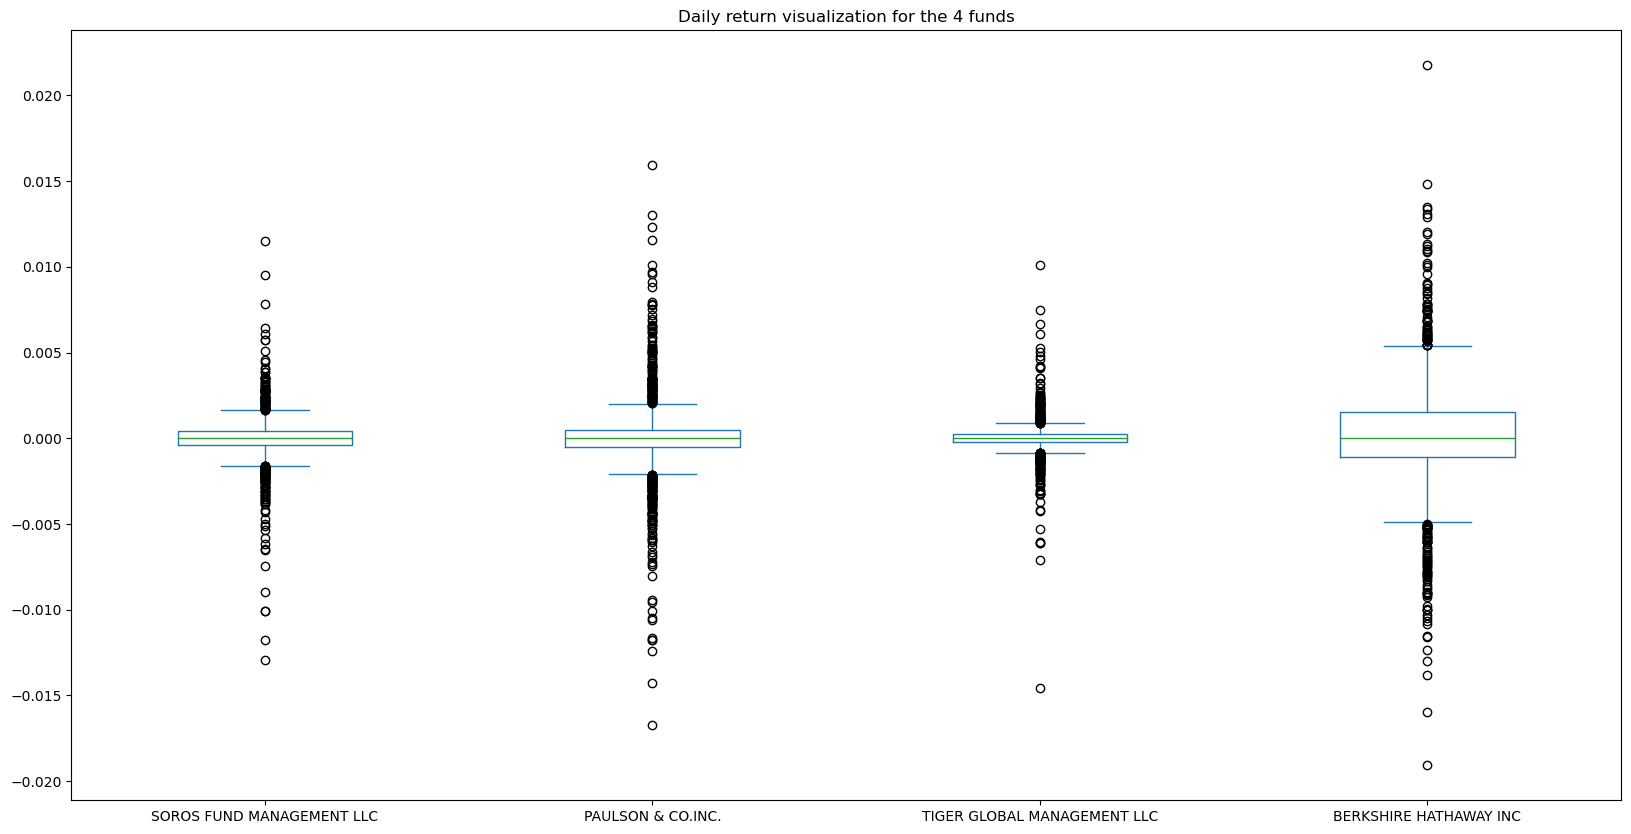

In [110]:
funds_daily_return.plot.box(figsize=(20,10), title = "Daily return visualization for the 4 funds")

**Question** Based on the box plot visualization of just the four fund portfolios, which fund was the most volatile (with the greatest spread) and which was the least volatile (with the smallest spread)?

**Answer** Based on the summary statistics and the box plot, the cryptocurrency with the smallest spread is Tiger Global Management with a standard deviation of .000996, and the one with the largest is Berkshire Hathaway with a standard deviation of 0.003256.

## Analyze the Risk

In [111]:
daily_return_whale.std().sort_values()

TIGER GLOBAL MANAGEMENT LLC    0.000996
SOROS FUND MANAGEMENT LLC      0.001405
PAULSON & CO.INC.              0.002199
BERKSHIRE HATHAWAY INC         0.003256
S&P 500                        0.011550
dtype: float64

In [112]:
trading_days = 252

annualized_standard_deviation = daily_return_whale.std() * np.sqrt(trading_days)

annualized_standard_deviation.sort_values()

TIGER GLOBAL MANAGEMENT LLC    0.015804
SOROS FUND MANAGEMENT LLC      0.022297
PAULSON & CO.INC.              0.034912
BERKSHIRE HATHAWAY INC         0.051692
S&P 500                        0.183345
dtype: float64

<AxesSubplot:title={'center':'Standard deviations and a 21 rolling window for the 4 funds and S&P 500'}, xlabel='date'>

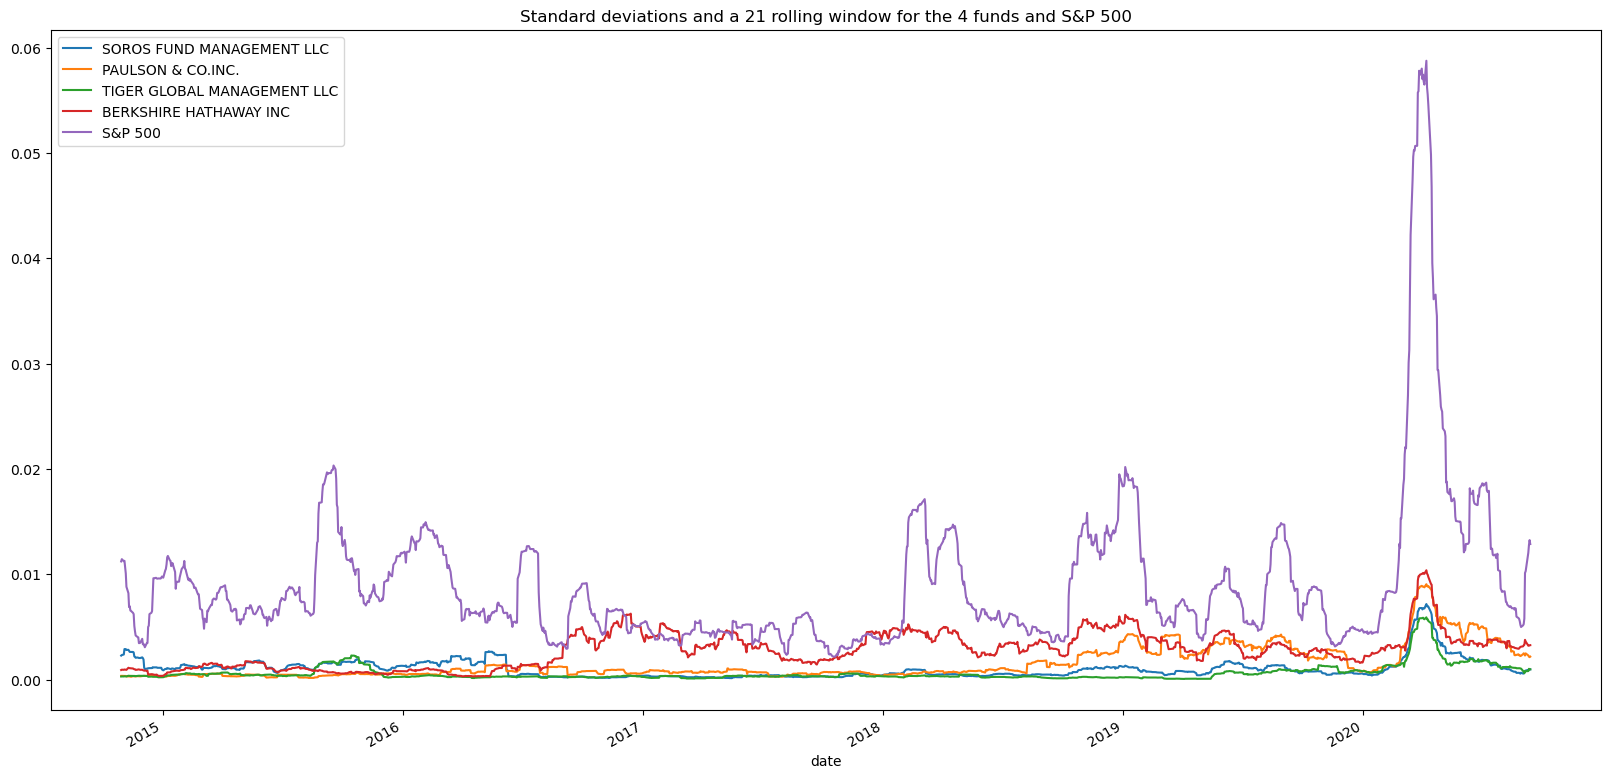

In [113]:
daily_return_whale.rolling(window=21).std().plot(figsize=(20,10),title= "Standard deviations and a 21 rolling window for the 4 funds and S&P 500")

<AxesSubplot:title={'center':'Standard deviations and a 21 rolling window for the 4 funds '}, xlabel='date'>

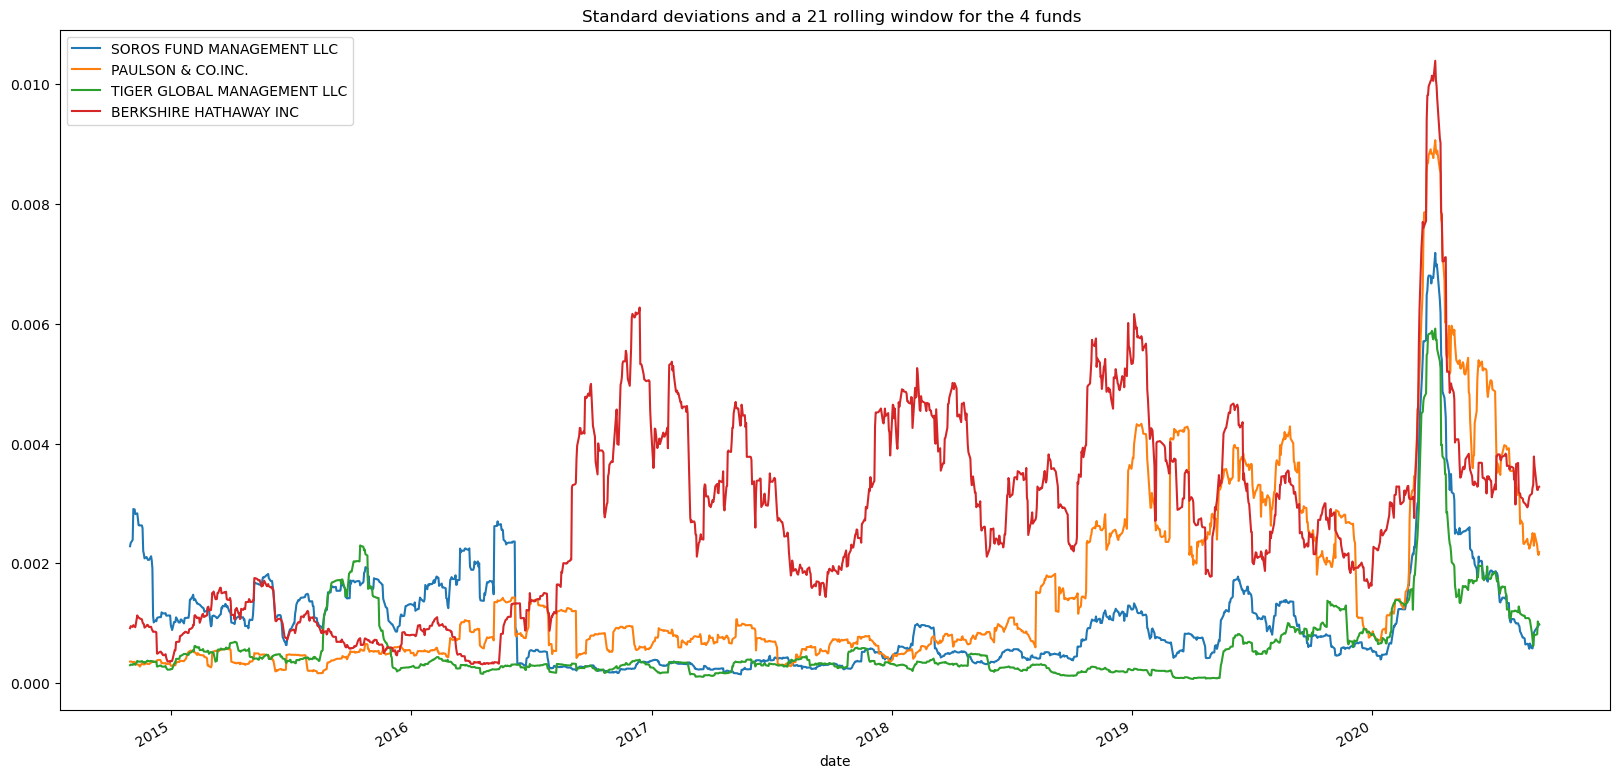

In [114]:
funds_daily_return.rolling(window=21).std().plot(figsize=(20,10),title= "Standard deviations and a 21 rolling window for the 4 funds ")

**Question 1**  Based on the annualized standard deviation, which portfolios pose more risk than the S&P 500?

**Answer 1** Based on the annualized standard deviation, BERKSHIRE HATHAWAY INC with a standard deviation of 0.051692

**Question 2** Based on the rolling metrics, does the risk of each portfolio increase at the same time that the risk of the S&P 500 increases?

**Answer 2** The answer is No, there is no xonnection between the risk of each fund and the S&P

**Question 3** Based on the rolling standard deviations of only the four fund portfolios, which portfolio poses the most risk? Does this change over time? 

**Answer 3** If we look at 2016, the riskiest that time was SOROS FUND MANAGEMENT LLC, but after mid 2016, BERKSHIRE HATHAWAY INC  became the riskiest.

## Analyze the Risk-Return Profile

In [115]:
annual_average_return = daily_return_whale.mean() * trading_days

annual_average_return.sort_values()

PAULSON & CO.INC.             -0.006633
SOROS FUND MANAGEMENT LLC     -0.002281
TIGER GLOBAL MANAGEMENT LLC    0.009151
BERKSHIRE HATHAWAY INC         0.037090
S&P 500                        0.108102
dtype: float64

In [116]:
sharp_ratios = annual_average_return/annualized_standard_deviation


sharp_ratios.sort_values()

PAULSON & CO.INC.             -0.189998
SOROS FUND MANAGEMENT LLC     -0.102290
TIGER GLOBAL MANAGEMENT LLC    0.579002
S&P 500                        0.589612
BERKSHIRE HATHAWAY INC         0.717512
dtype: float64

<AxesSubplot:title={'center':'Sharp Ratios for the 4 funds and S&P 500'}>

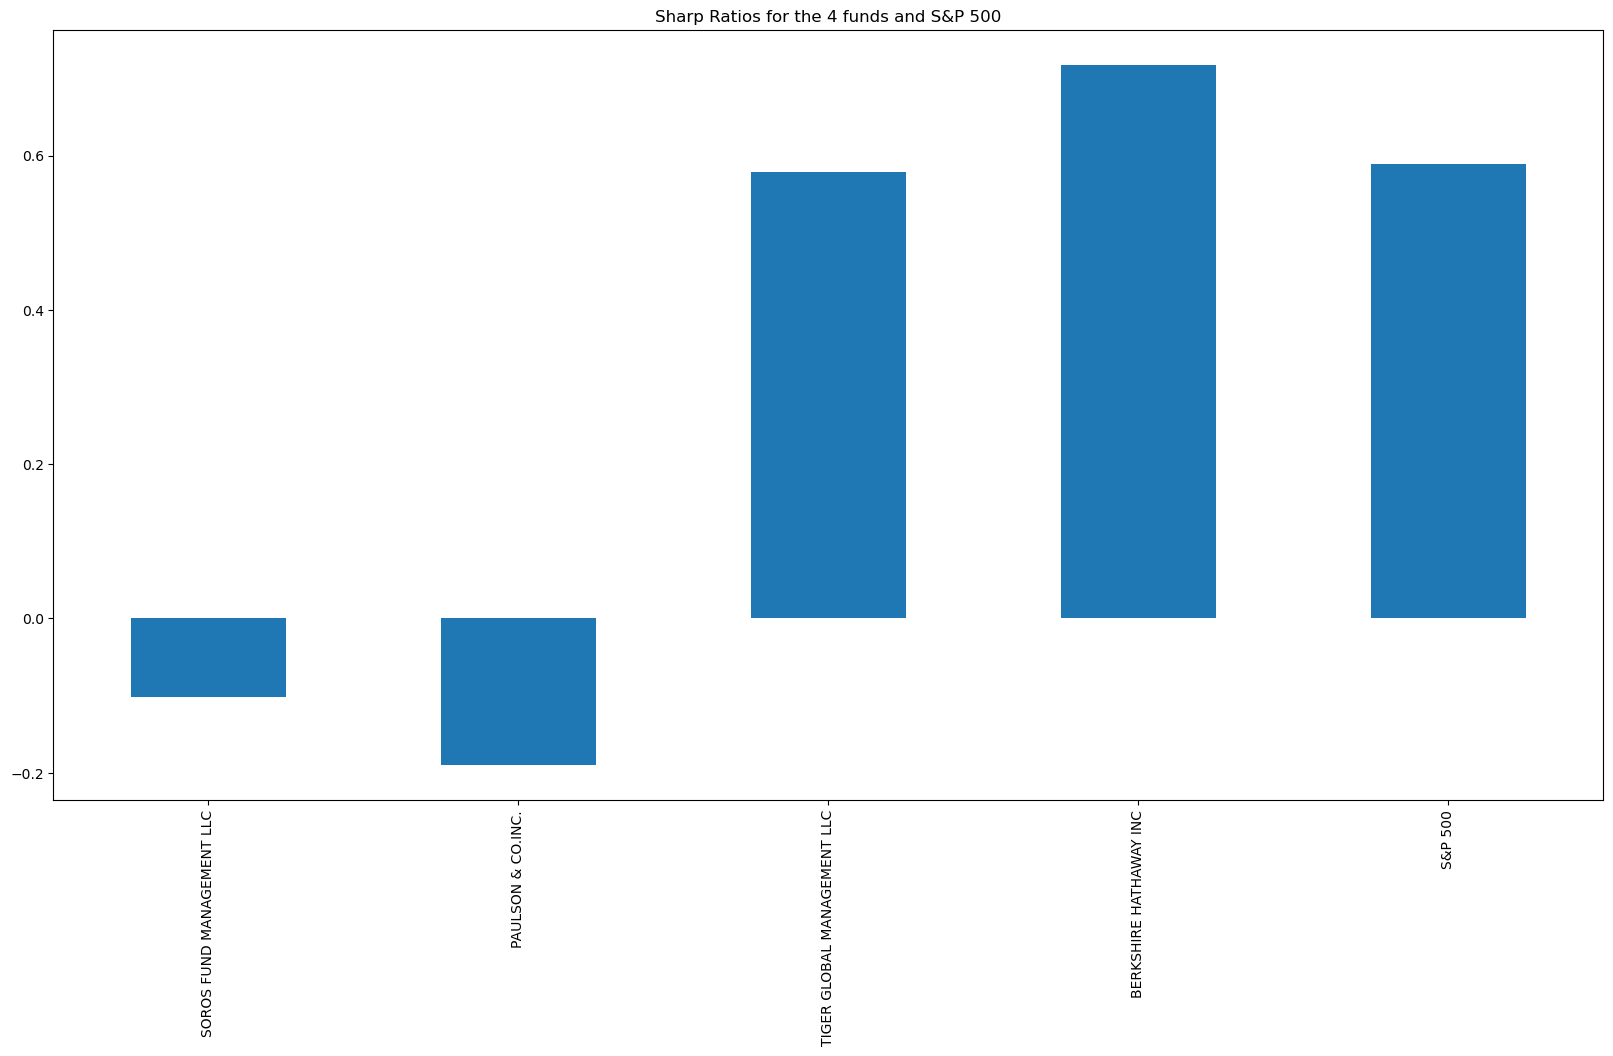

In [117]:
sharp_ratios.plot.bar(figsize=(20,10), title = "Sharp Ratios for the 4 funds and S&P 500")

**Question** Which of the four portfolios offers the best risk-return profile? Which offers the worst?
    
**Answer** BERKSHIRE HATHAWAY INC offer the best risk-return profile with a sharp ratio of 0.717512, while PAULSON & CO.INC. -0.189998

## Diversify the Portfolio

In [124]:
snp_variance = daily_return_whale["S&P 500"].rolling(window=60).var()

snp_variance.tail()

date
2020-09-04    0.000103
2020-09-08    0.000116
2020-09-09    0.000120
2020-09-10    0.000121
2020-09-11    0.000120
Name: S&P 500, dtype: float64

### Portfolio 1

In [126]:
berkshire_converiance = daily_return_whale["BERKSHIRE HATHAWAY INC"].rolling(window=60).cov(daily_return_whale["S&P 500"])

berkshire_converiance.tail()

date
2020-09-04    0.000021
2020-09-08    0.000023
2020-09-09    0.000024
2020-09-10    0.000024
2020-09-11    0.000024
dtype: float64

In [127]:
berkshire_beta= berkshire_converiance/snp_variance

berkshire_beta.tail()

date
2020-09-04    0.207879
2020-09-08    0.203051
2020-09-09    0.196632
2020-09-10    0.197543
2020-09-11    0.199411
dtype: float64

In [128]:
berkshire_beta.mean()

0.2214986101354593

<AxesSubplot:title={'center':'BERKSHIRE HATHAWAY INC 60-days rolling beta'}, xlabel='date'>

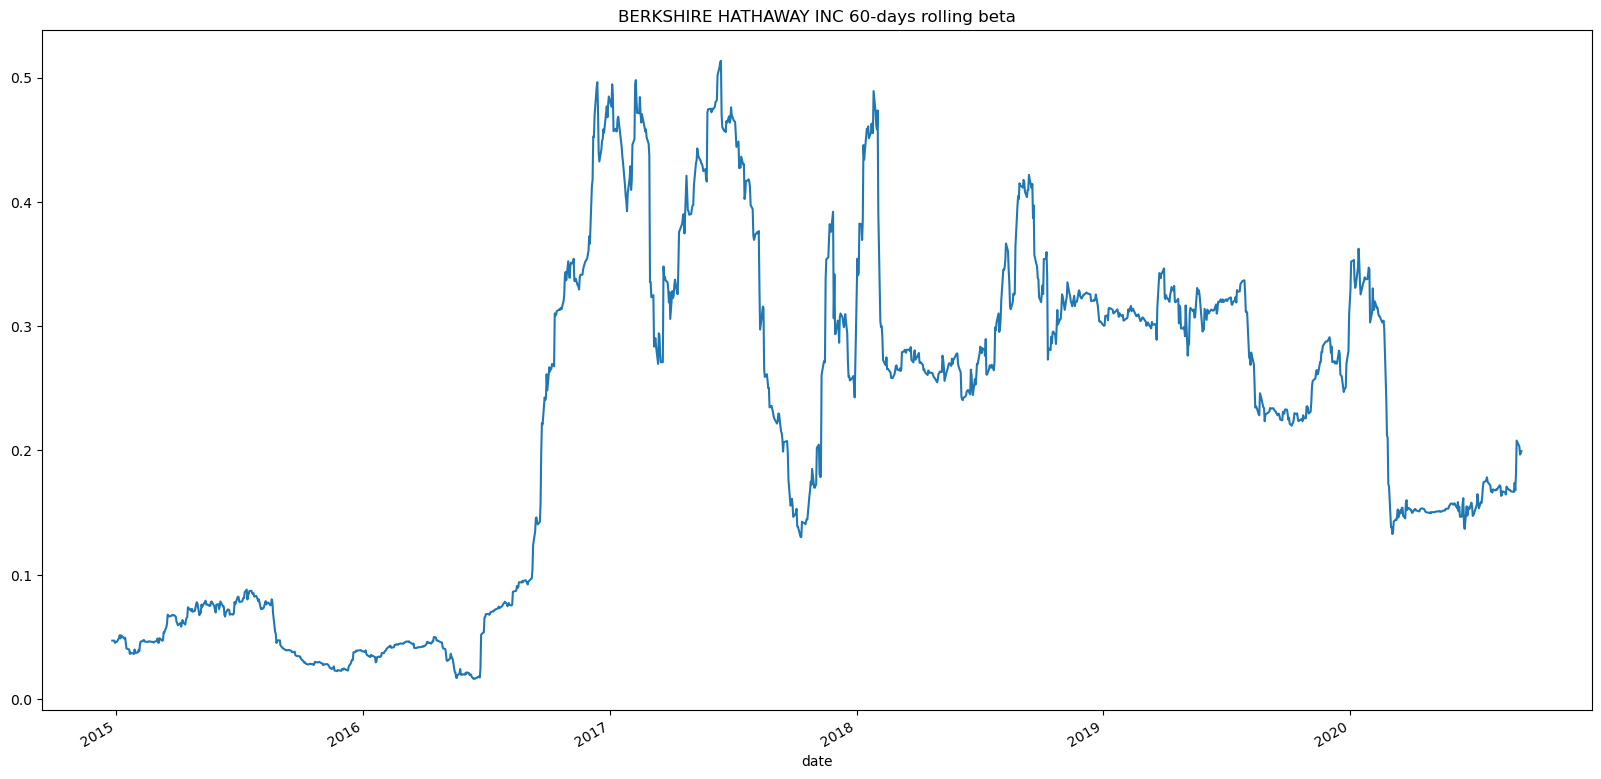

In [129]:
berkshire_beta.plot(figsize=(20,10), title="BERKSHIRE HATHAWAY INC 60-days rolling beta")

### Portfolio 2

In [130]:
paulson_covariance = daily_return_whale["PAULSON & CO.INC."].rolling(window=60).cov(daily_return_whale["S&P 500"])

paulson_covariance.tail()

date
2020-09-04    0.000009
2020-09-08    0.000010
2020-09-09    0.000010
2020-09-10    0.000010
2020-09-11    0.000010
dtype: float64

In [131]:
paulson_beta = paulson_covariance/snp_variance

paulson_beta.tail()

date
2020-09-04    0.085217
2020-09-08    0.087760
2020-09-09    0.084976
2020-09-10    0.084373
2020-09-11    0.083657
dtype: float64

In [132]:
paulson_beta.mean()

0.07767796326036529

<AxesSubplot:title={'center':'PAULSON & CO.INC.  60-days rolling beta'}, xlabel='date'>

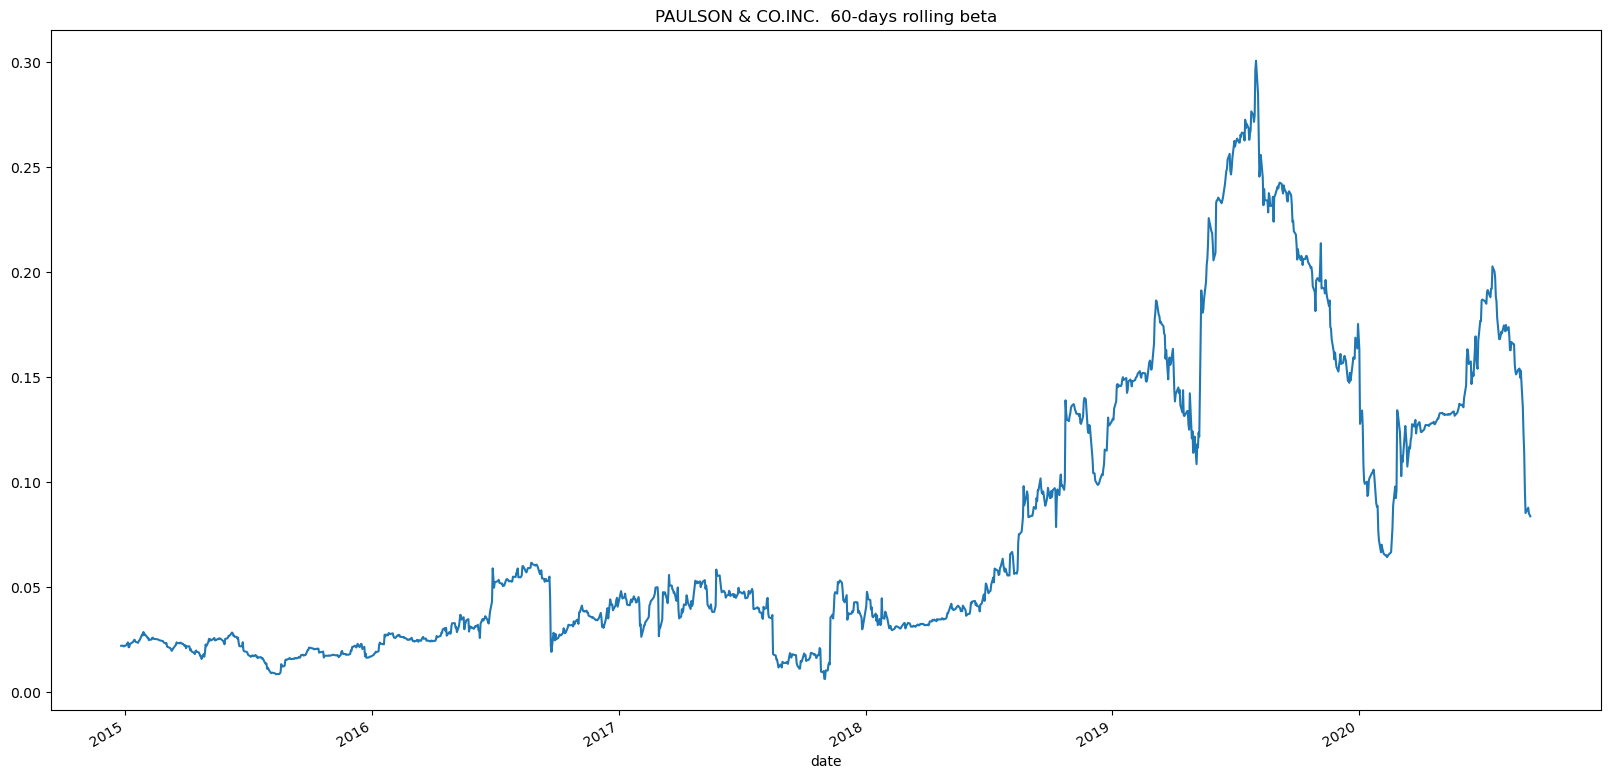

In [133]:
paulson_beta.plot(figsize=(20,10), title="PAULSON & CO.INC.  60-days rolling beta")

**Question 1** Which of the two portfolios seem more sensitive to movements in the S&P 500?
    
**Answer 1** # YOUR ANSWER HERE


**Question 2** Which of the two portfolios do you recommend for inclusion in your firm’s suite of fund offerings?
    
**Answer 2** # YOUR ANSWER HERE